In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
parks = gpd.read_file('../data/Metro Parks Boundaries (GIS).geojson')
print(parks.crs)
parks.head()

EPSG:4326


,acres,name,year_estab,common_nam,status,address,lon,lat,descriptio,geometry
0,69.86,Harpeth River Park,1988,Harpeth River,PARK,7820 Coley Davis Rd,-86.9592214,36.07738249,Harpeth River State Park has much historical a...,"MULTIPOLYGON (((-86.95547 36.07930, -86.95578 ..."
1,9.88,Harpeth Knoll Park,1972,Harpeth Knoll,PARK,708 Goodpasture Terrace,-86.93815537,36.05942777,"Huge grassy field with playground, and shade s...","MULTIPOLYGON (((-86.93860 36.06077, -86.93742 ..."
2,17.14,Bellevue Park,1982,Red Caboose,PARK,656 Colice Jeanne Rd,-86.93354496,36.07159731,"Bellevue Park, known as Red Caboose Park, is p...","MULTIPOLYGON (((-86.93207 36.06954, -86.93283 ..."
3,809.59,Bells Bend Park,2007,Bells Bend,PARK,4187 Old Hickory Blvd,-86.92646294,36.15016925,"Located in western Davidson County, this park ...","MULTIPOLYGON (((-86.93987 36.16093, -86.93495 ..."
4,2168.792,Alvin G. Beaman Park,1996,Beaman,PARK,5911 Old Hickory Blvd.,-86.91984207,36.26075833,Beaman Park provides education and awareness p...,"MULTIPOLYGON (((-86.90367 36.27352, -86.90364 ..."


In [3]:
type(parks)

geopandas.geodataframe.GeoDataFrame

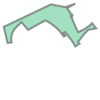

In [4]:
parks.loc[0,'geometry']

In [5]:
print(parks.loc[0,'geometry'])

MULTIPOLYGON (((-86.9554652476398 36.079301455798536, -86.95577768867267 36.079139093437696, -86.95554165522448 36.07881679726515, -86.95555002481612 36.078763362963265, -86.95547131924887 36.078720729617956, -86.95532248405858 36.07851744306786, -86.95528618171004 36.07845372197693, -86.95525327758185 36.078391071735794, -86.95523923349029 36.07834887403824, -86.95522977080738 36.07832175489392, -86.95522131619775 36.078294075262384, -86.95521421491281 36.078266384907266, -86.9552084636451 36.07823840895774, -86.95520406570714 36.07821042318611, -86.95520101888307 36.0781821509104, -86.9551993253869 36.078153868812706, -86.95519898519579 36.078125575091285, -86.95519999833 36.07809727154806, -86.95520236476608 36.078068956381045, -86.9552057503346 36.078040908937375, -86.955210827808 36.0780128471868, -86.9550086936845 36.07817351059672, -86.95500864747362 36.07817345327956, -86.95499806745696 36.07816107206578, -86.9549716235682 36.078130121682676, -86.95500338104712 36.0780332215624

<Axes: >

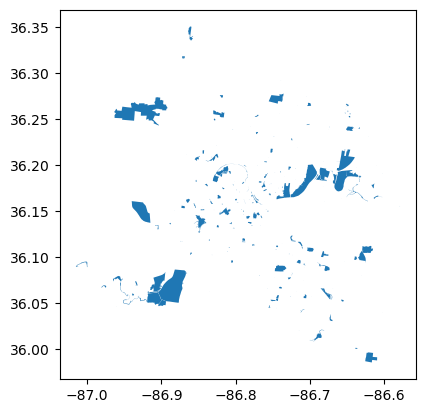

In [6]:
parks.plot()

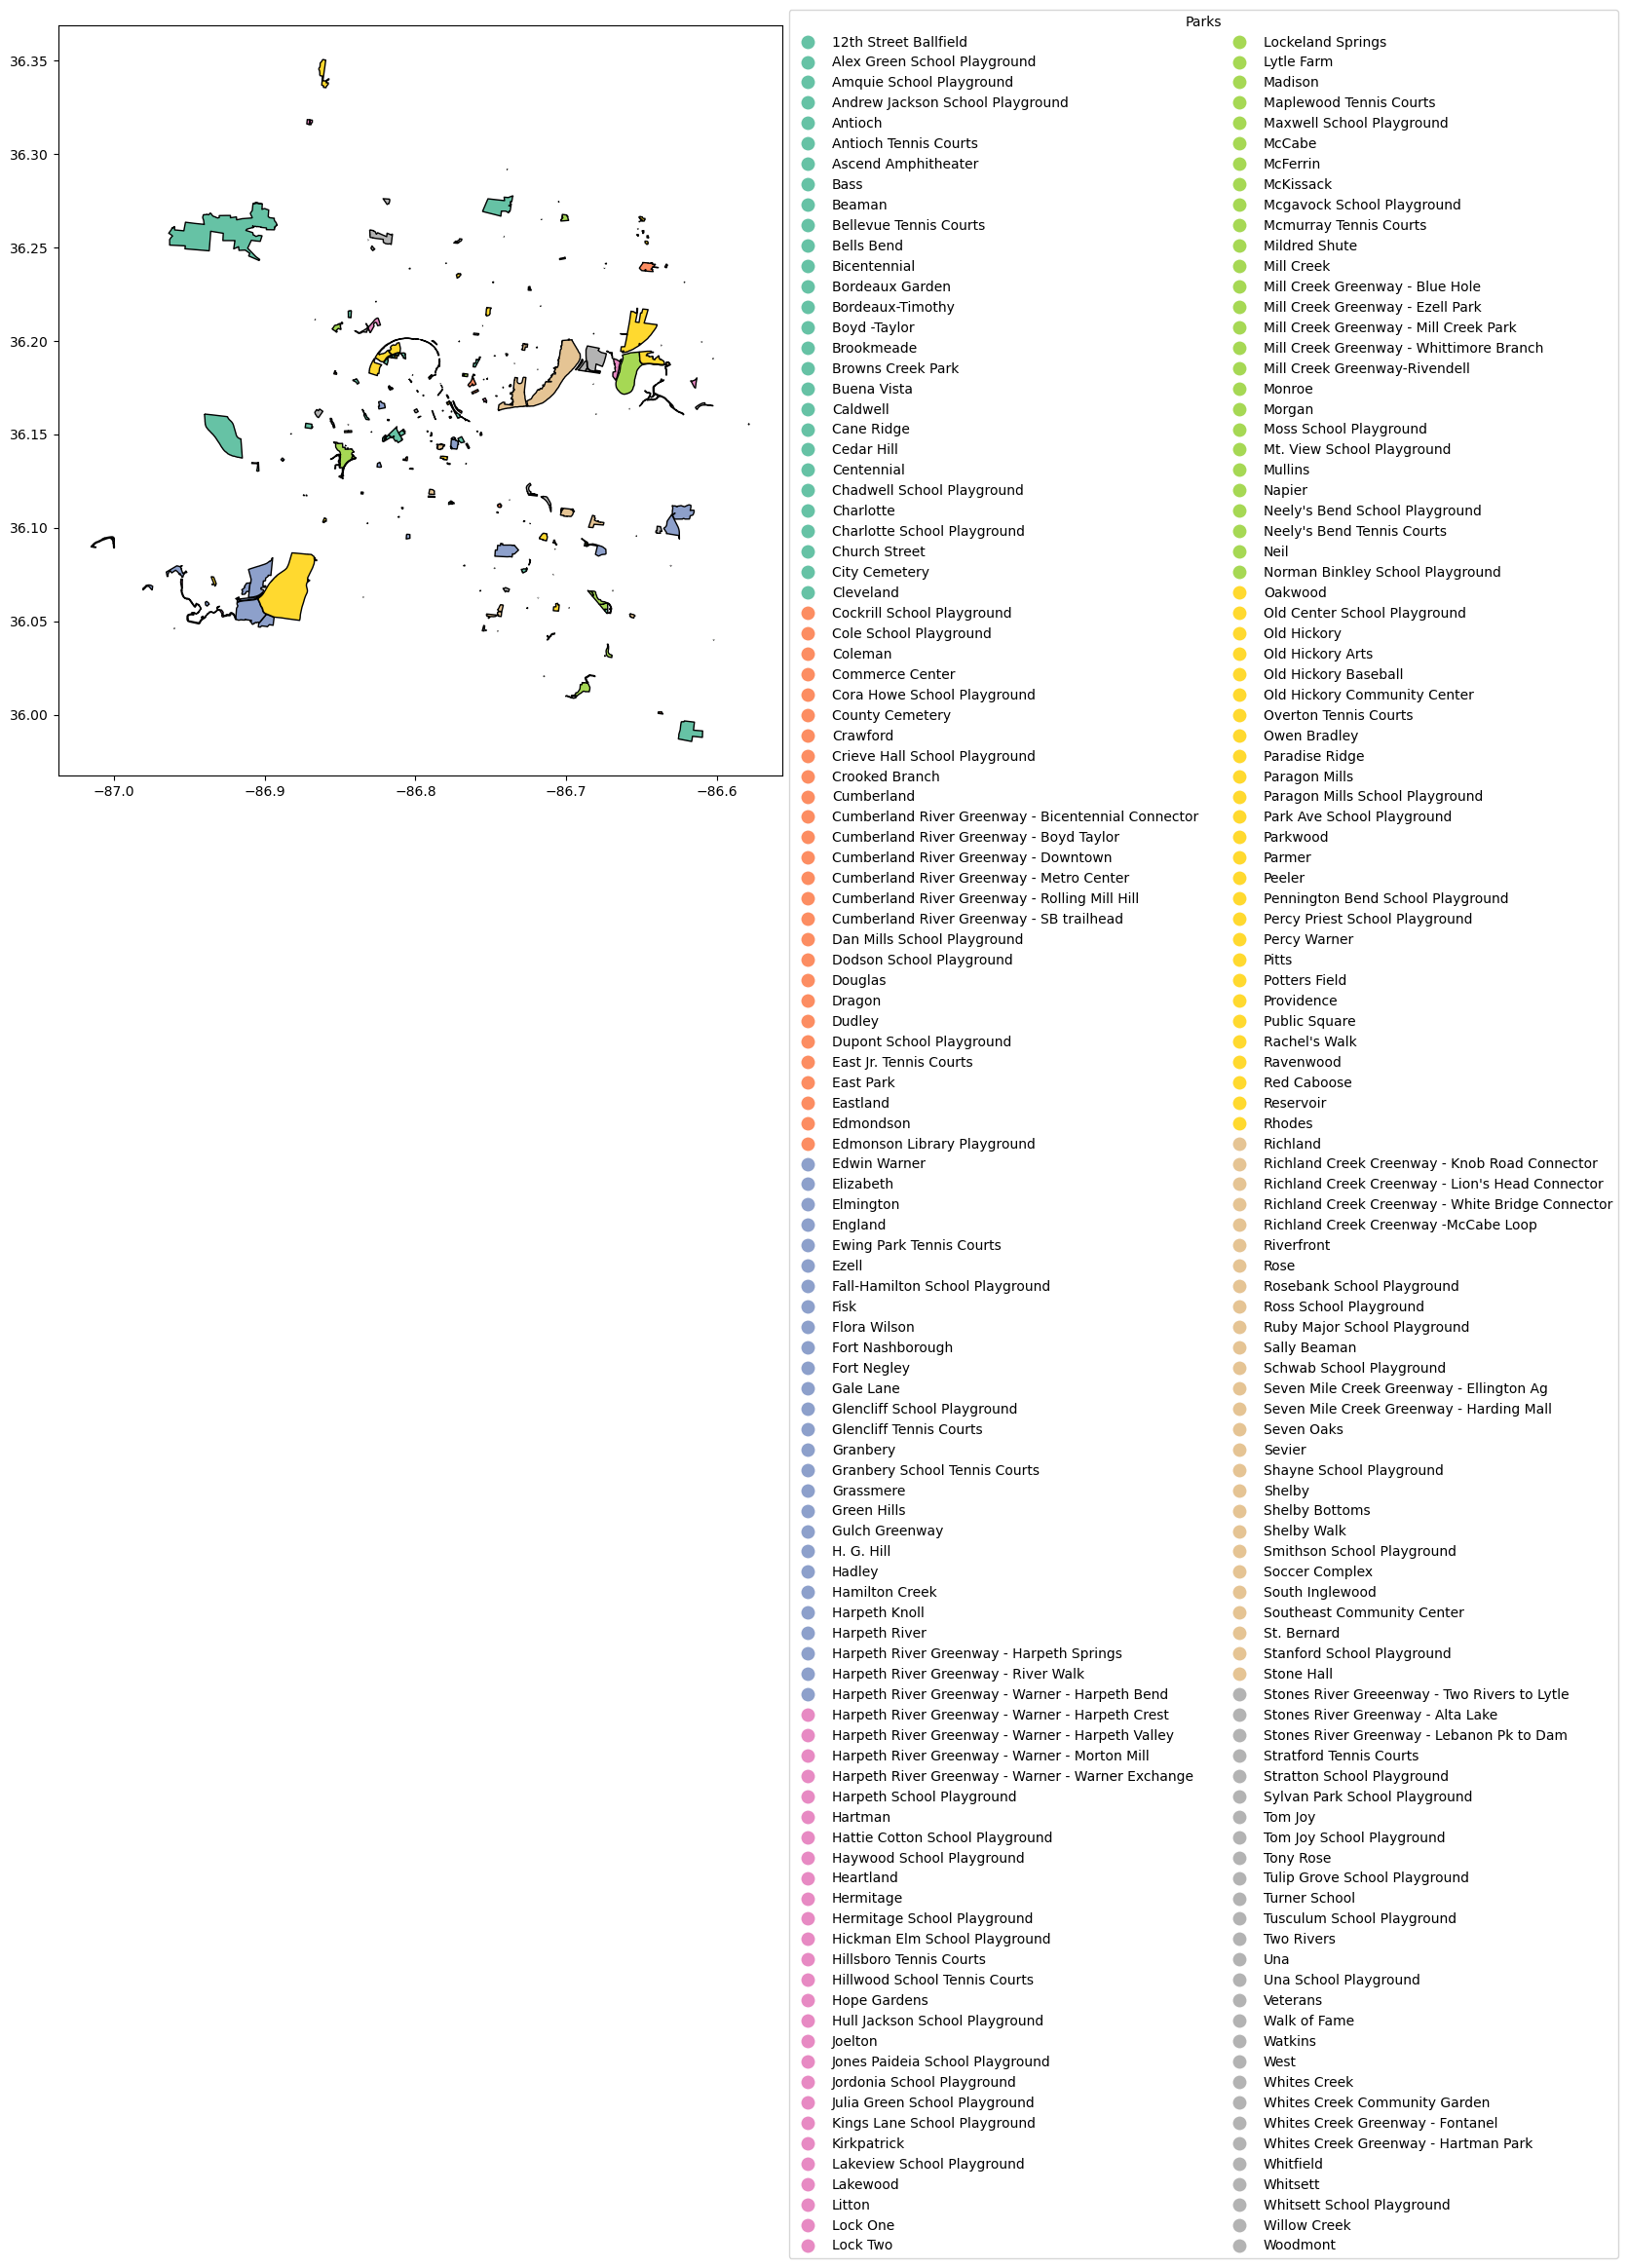

In [14]:
leg_kwds = {'title' : 'Parks', 'loc' : 'upper left',
            'bbox_to_anchor' : (1, 1.03), 'ncol': 2}

parks.plot(column = 'common_nam',figsize=(10,10),
           edgecolor = 'black',
           legend = True, legend_kwds = leg_kwds,
           cmap = 'Set2')

plt.show()

In [15]:
h20_stops = gpd.read_file('../data/Public Water Fountains and Hydration Systems (GIS).geojson')
print(h20_stops.shape)
h20_stops.head(3)

(73, 10)


,name,location,dog,objectid,lon,ada,cnt,lat,feat_type,geometry
0,Beaman Water Fountain,NaN,Y,45921,36.26250456,Y,1,-86.89425346,Fountain/Bottle filler/ADA,POINT (-86.89425 36.26250)
1,Edwin Nature Center Water Fountain,Restrooms Breezeway,N,45937,36.06089915,Y,1,-86.90622747,Bottle Filler/ADA,POINT (-86.90623 36.06090)
2,Percy Warner Belle Meade Gates Water Fountain,Belle Meade Gates,Y,45964,36.08310102,Y,1,-86.86727566,ADA Bowl,POINT (-86.86728 36.08310)


In [16]:
h20_stops.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   name       73 non-null     object  
 1   location   65 non-null     object  
 2   dog        73 non-null     object  
 3   objectid   73 non-null     object  
 4   lon        73 non-null     object  
 5   ada        73 non-null     object  
 6   cnt        73 non-null     object  
 7   lat        73 non-null     object  
 8   feat_type  73 non-null     object  
 9   geometry   73 non-null     geometry
dtypes: geometry(1), object(9)
memory usage: 5.8+ KB


In [17]:
parks.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [18]:
h20_stops.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [19]:
parks = parks[['common_nam', 'geometry']]

In [31]:
h20_parks = gpd.sjoin(h20_stops, parks, how = 'inner', op = 'within')

c:\Users\musta\anaconda3\envs\geospatial\lib\site-packages\IPython\core\interactiveshell.py:3445: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [29]:
h20_parks.head()

,name,location,dog,objectid,lon,ada,cnt,lat,feat_type,geometry,index_right,common_nam
0,Beaman Water Fountain,NaN,Y,45921,36.26250456,Y,1,-86.89425346,Fountain/Bottle filler/ADA,POINT (-86.89425 36.26250),4,Beaman
1,Edwin Nature Center Water Fountain,Restrooms Breezeway,N,45937,36.06089915,Y,1,-86.90622747,Bottle Filler/ADA,POINT (-86.90623 36.06090),5,Edwin Warner
29,Edwin Warner Dog Park Water Fountain,Dog Park,Y,46595,36.05195562,N,1,-86.90162012,Dog Only,POINT (-86.90162 36.05196),5,Edwin Warner
30,Edwin Warner Concession Water Fountain,WNSL Concessions,N,46597,36.04998346,Y,1,-86.8981744,Standard/ADA,POINT (-86.89817 36.04998),5,Edwin Warner
69,Harpeth River Greenway,Butler Field Trail Head,Y,0,36.05133033,N,1,-86.91617134,Standard/ADA/Bottle Filler,POINT (-86.91617 36.05133),5,Edwin Warner


In [34]:
h20_in_ew = h20_parks.loc[h20_parks['common_nam'] == 'Edwin Warner']
h20_in_ew.shape

(4, 12)

In [35]:
polyh20ew = parks.loc[parks['common_nam'] == 'Edwin Warner']
polyh20ew.shape

(1, 2)

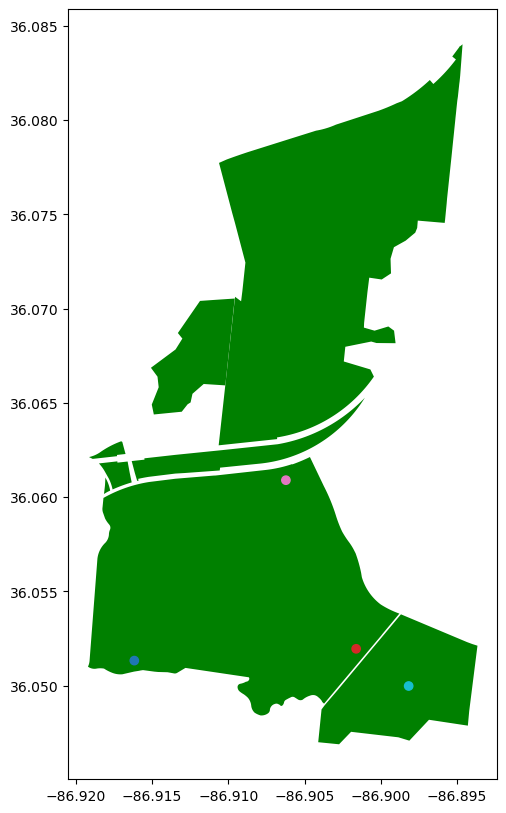

In [37]:
ax = polyh20ew.plot(figsize = (8, 10), color = 'green')
h20_in_ew.plot( ax = ax, column = 'location');
plt.show();

In [38]:
polyh20ew.geometry.centroid

C:\Users\musta\AppData\Local\Temp\ipykernel_26528\3585581701.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polyh20ew.geometry.centroid


5    POINT (-86.90624 36.06269)
dtype: geometry

In [39]:
center = polyh20ew.geometry.centroid[5]

C:\Users\musta\AppData\Local\Temp\ipykernel_26528\3010759495.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polyh20ew.geometry.centroid[5]


In [40]:
area_center = [center.y, center.x]

print(area_center)

[36.06269117889579, -86.9062412767526]


In [44]:
map_ew = folium.Map(location = area_center, zoom_start= 14)
map_ew

In [52]:
i = 0
for row_index, row_values in h20_in_ew.iterrows():
    if i < 3:
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('________________________')
        i+=1

index is 1
values are:
 
name                     Edwin Nature Center Water Fountain
location                                Restrooms Breezeway
dog                                                       N
objectid                                              45937
lon                                             36.06089915
ada                                                       Y
cnt                                                       1
lat                                            -86.90622747
feat_type                                 Bottle Filler/ADA
geometry       POINT (-86.90622747033689 36.06089914863129)
index_right                                               5
common_nam                                     Edwin Warner
Name: 1, dtype: object
________________________
index is 29
values are:
 
name                   Edwin Warner Dog Park Water Fountain
location                                           Dog Park
dog                                                       Y
o

In [54]:
map_ew = folium.Map(location = area_center, zoom_start= 14)
folium.GeoJson(polyh20ew).add_to(map_ew)

for row_index, row_values in h20_in_ew.iterrows():
    loc = [row_values['lon'], row_values['lat']]
    pop = str(row_values['location'])
    icon=folium.Icon(color="blue")

    marker = folium.Marker(
        location = loc,
        popup = pop, icon = icon)
    
    marker.add_to(map_ew)
map_ew.save('../maps/map_ew.html')

map_ew